## UJIAN TENGAH SEMESTER MATA KULIAH ANALITIKA MEDIA SOSIAL

Alief Rachmandias Darmawan - A12.2020.06416 - A12.6501

## Pemanggilan Library

In [1]:
import pandas as pd
import time
import tweepy
import numpy as np
import swifter

## Load Dataset

In [2]:
df = pd.read_csv('dataset_narasi_fixlabel.csv', sep=';')

df.head()

,Column1,Unnamed: 0,Tweets,Label
0,0,0,Ketua DPP PHRI DKI Jakarta Sutrisno Iwantono b...,1
1,1,1,"Soalnya, RKUHP yang baru berisi pasal perzinah...",1
2,2,2,"#Semuabisakena. Inget, kan, sama kampanye peno...",1
3,3,3,"Gugatannya udah kalah. Selanjutnya, Pak Jokowi...",1
4,4,4,Semoga aja amunisi Kominfo bisa efektif buat n...,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Column1     100 non-null    int64 
 1   Unnamed: 0  100 non-null    int64 
 2   Tweets      100 non-null    object
 3   Label       100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


## Tahapan Pre Processing

In [4]:
import re
import string
import time
from copy import deepcopy

## Proses Penataan Data

- Disini saya menggunakan ekpharasis

In [5]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis', 'censored'},
    annotate={"hashtag"},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


- Memanggil ekhparasis

In [6]:
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))

def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')

def remove_space(text):
    return " ".join(text.split())

def remove_emoji(text):
    return ' '.join(re.sub("([x#][A-Za-z0-9]+)"," ", text).split())

def remove_tab(text):
    return text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

def remove_tab2(text):
    return re.sub('\s+',' ',text)

def remove_rt(text):
    return text.replace('RT'," ")

def remove_mention(text):
    return ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

def remove_incomplete_url(text):
    return re.sub(r'https?:\/\/\S*', '', text, flags=re.MULTILINE)

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_excessive_dot(text):
    return text.replace('..'," ")

def change_stripe(text):
    return text.replace('-'," ")

def lower(text):
    return text.lower()

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_excessive_dot(text):
    return text.replace('..'," ")

def lower(text):
    return text.lower()

def remove_whitespace_LT(text):
    return text.strip()

def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", text) 

def remove_number_eks(text):
    return text.replace('<number>'," ")

def remove_angka(text):
    return re.sub(r"\d+", "", text) 

def remove_URL_eks(text):
    return text.replace('URL'," ").replace('url'," ")

def space_punctuation(text):
    return re.sub('(?<! )(?=[.,!?()])|(?<=[.,!?()])(?! )', r' ', text)

- Memulai proses pembersihan

In [7]:
i = 0
final_string = []
s = ""
for text in df['Tweets'].values:
    filteredSentence = []
    EachReviewText = ""
    proc = remove_rt(text)
    proc = lower(proc)
    proc = change_stripe(proc)
    proc = remove_emoji(proc)
    proc = remove_tab(proc)
    proc = remove_tab2(proc)
    proc = non_ascii(proc)
    proc = remove_incomplete_url(proc)
    proc = remove_excessive_dot(proc)
    proc = remove_whitespace_LT(proc)
    proc = remove_whitespace_multiple(proc)
    proc = remove_single_char(proc)
    proc = space_punctuation(proc)
    proc = remove_punctuation(proc)
    proc = remove_space(proc)
    proc = bersih_data(proc)
    proc = remove_number_eks(proc)
    proc = remove_angka(proc) 
    proc = remove_URL_eks(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)

In [8]:
df["step01"] = final_string

df.head(10)

,Column1,Unnamed: 0,Tweets,Label,step01
0,0,0,Ketua DPP PHRI DKI Jakarta Sutrisno Iwantono b...,1,ketua dpp phri dki jakarta sutrisno iwantono b...
1,1,1,"Soalnya, RKUHP yang baru berisi pasal perzinah...",1,soalnya rkuhp yang baru berisi pasal perzinaha...
2,2,2,"#Semuabisakena. Inget, kan, sama kampanye peno...",1,inget kan sama kampanye penolakan rancangan un...
3,3,3,"Gugatannya udah kalah. Selanjutnya, Pak Jokowi...",1,gugatannya udah kalah selanjutnya pak jokowi d...
4,4,4,Semoga aja amunisi Kominfo bisa efektif buat n...,0,semoga aja amunisi kominfo bisa efektif buat n...
5,5,5,"Menurut LBH Bogor, Irwansyah, pemerintah Kota ...",1,menurut lbh bogor irwansyah pemerintah kota bo...
6,6,6,"“Harapan saya untuk Arema, yang meninggal dan ...",0,harapan saya untuk arema yang meninggal dan ja...
7,7,7,Kayaknya di luaran sana gampang banget ya buat...,1,kayaknya di luaran sana gampang banget ya buat...
8,8,8,Izin dulu buat pake lagunya ke .Feast bisa kal...,1,izin dulu buat pake lagunya ke feast bisa kali...
9,9,9,Apa sih etilen glikol dan dietilen glikol yang...,0,apa sih etilen glikol dan dietilen glikol yang...


In [9]:
df = df.drop(['Column1'], axis=1)

df = df.drop(['Unnamed: 0'], axis=1)

In [10]:
df.head(10)

,Tweets,Label,step01
0,Ketua DPP PHRI DKI Jakarta Sutrisno Iwantono b...,1,ketua dpp phri dki jakarta sutrisno iwantono b...
1,"Soalnya, RKUHP yang baru berisi pasal perzinah...",1,soalnya rkuhp yang baru berisi pasal perzinaha...
2,"#Semuabisakena. Inget, kan, sama kampanye peno...",1,inget kan sama kampanye penolakan rancangan un...
3,"Gugatannya udah kalah. Selanjutnya, Pak Jokowi...",1,gugatannya udah kalah selanjutnya pak jokowi d...
4,Semoga aja amunisi Kominfo bisa efektif buat n...,0,semoga aja amunisi kominfo bisa efektif buat n...
5,"Menurut LBH Bogor, Irwansyah, pemerintah Kota ...",1,menurut lbh bogor irwansyah pemerintah kota bo...
6,"“Harapan saya untuk Arema, yang meninggal dan ...",0,harapan saya untuk arema yang meninggal dan ja...
7,Kayaknya di luaran sana gampang banget ya buat...,1,kayaknya di luaran sana gampang banget ya buat...
8,Izin dulu buat pake lagunya ke .Feast bisa kal...,1,izin dulu buat pake lagunya ke feast bisa kali...
9,Apa sih etilen glikol dan dietilen glikol yang...,0,apa sih etilen glikol dan dietilen glikol yang...


## Hapus Data Kosong

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  100 non-null    object
 1   Label   100 non-null    int64 
 2   step01  100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [12]:
df_hapus = df[~df['step01'].str.contains(" ")]

df_hapus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  0 non-null      object
 1   Label   0 non-null      int64 
 2   step01  0 non-null      object
dtypes: int64(1), object(2)
memory usage: 0.0+ bytes


In [13]:
df_hapus.head()

,Tweets,Label,step01


In [14]:
df_new = df[~df.isin(df_hapus)].dropna()

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  100 non-null    object
 1   Label   100 non-null    int64 
 2   step01  100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [15]:
df_new

,Tweets,Label,step01
0,Ketua DPP PHRI DKI Jakarta Sutrisno Iwantono b...,1,ketua dpp phri dki jakarta sutrisno iwantono b...
1,"Soalnya, RKUHP yang baru berisi pasal perzinah...",1,soalnya rkuhp yang baru berisi pasal perzinaha...
2,"#Semuabisakena. Inget, kan, sama kampanye peno...",1,inget kan sama kampanye penolakan rancangan un...
3,"Gugatannya udah kalah. Selanjutnya, Pak Jokowi...",1,gugatannya udah kalah selanjutnya pak jokowi d...
4,Semoga aja amunisi Kominfo bisa efektif buat n...,0,semoga aja amunisi kominfo bisa efektif buat n...
...,...,...,...
95,Kenapa sih maksa banget jadwal pertandingan di...,1,kenapa sih maksa banget jadwal pertandingan di...
96,Kelima terdakwa dalam kasus pembunuhan Yosua t...,1,kelima terdakwa dalam kasus pembunuhan yosua t...
97,Lembaga Perlindungan Saksi dan Korban (LPSK) m...,1,lembaga perlindungan saksi dan korban lpsk men...
98,"Eliezer beserta Ferdy Sambo, Putri Candrawathi...",1,eliezer beserta ferdy sambo putri candrawathi ...


## Normalisasi Kata Slang

In [16]:
import nltk
import swifter
from nltk.tokenize import word_tokenize 

In [17]:
def word_tokenize_wrapper(text):
  return word_tokenize(text)

In [18]:
df_new['tokens'] = df["step01"].apply(word_tokenize_wrapper)

In [19]:
df_new.head()

,Tweets,Label,step01,tokens
0,Ketua DPP PHRI DKI Jakarta Sutrisno Iwantono b...,1,ketua dpp phri dki jakarta sutrisno iwantono b...,"[ketua, dpp, phri, dki, jakarta, sutrisno, iwa..."
1,"Soalnya, RKUHP yang baru berisi pasal perzinah...",1,soalnya rkuhp yang baru berisi pasal perzinaha...,"[soalnya, rkuhp, yang, baru, berisi, pasal, pe..."
2,"#Semuabisakena. Inget, kan, sama kampanye peno...",1,inget kan sama kampanye penolakan rancangan un...,"[inget, kan, sama, kampanye, penolakan, rancan..."
3,"Gugatannya udah kalah. Selanjutnya, Pak Jokowi...",1,gugatannya udah kalah selanjutnya pak jokowi d...,"[gugatannya, udah, kalah, selanjutnya, pak, jo..."
4,Semoga aja amunisi Kominfo bisa efektif buat n...,0,semoga aja amunisi kominfo bisa efektif buat n...,"[semoga, aja, amunisi, kominfo, bisa, efektif,..."


In [20]:
normalized_word = pd.read_csv('kamus_clean.csv')

In [21]:
normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

In [22]:
df_new['final_tokens'] = df_new['tokens'].apply(normalized_term)

In [23]:
i=0
final_string_tokens = []
for text in df_new['final_tokens'].values:
    EachReviewText = ""
    EachReviewText = ' '.join(text)
    final_string_tokens.append(EachReviewText)

In [24]:
df_new["step02"] = final_string_tokens

df_new.head()

,Tweets,Label,step01,tokens,final_tokens,step02
0,Ketua DPP PHRI DKI Jakarta Sutrisno Iwantono b...,1,ketua dpp phri dki jakarta sutrisno iwantono b...,"[ketua, dpp, phri, dki, jakarta, sutrisno, iwa...","[ketua, dpp, phri, dki, jakarta, sutrisno, iwa...",ketua dpp phri dki jakarta sutrisno iwantono b...
1,"Soalnya, RKUHP yang baru berisi pasal perzinah...",1,soalnya rkuhp yang baru berisi pasal perzinaha...,"[soalnya, rkuhp, yang, baru, berisi, pasal, pe...","[soalnya, rkuhp, yang, baru, berisi, pasal, pe...",soalnya rkuhp yang baru berisi pasal perzinaha...
2,"#Semuabisakena. Inget, kan, sama kampanye peno...",1,inget kan sama kampanye penolakan rancangan un...,"[inget, kan, sama, kampanye, penolakan, rancan...","[inget, kan, sama, kampanye, penolakan, rancan...",inget kan sama kampanye penolakan rancangan un...
3,"Gugatannya udah kalah. Selanjutnya, Pak Jokowi...",1,gugatannya udah kalah selanjutnya pak jokowi d...,"[gugatannya, udah, kalah, selanjutnya, pak, jo...","[gugatannya, udah, kalah, selanjutnya, pak, jo...",gugatannya udah kalah selanjutnya pak jokowi d...
4,Semoga aja amunisi Kominfo bisa efektif buat n...,0,semoga aja amunisi kominfo bisa efektif buat n...,"[semoga, aja, amunisi, kominfo, bisa, efektif,...","[semoga, aja, amunisi, kominfo, bisa, efektif,...",semoga aja amunisi kominfo bisa efektif buat n...


## Simpan Clean Dataset

In [25]:
df_new.to_csv('clean_dataset_narasi.csv',sep=",")

## Stemming menggunakan Sastrawi

In [26]:
dataset = pd.read_csv('clean_dataset_narasi.csv')

dataset.head()

,Unnamed: 0,Tweets,Label,step01,tokens,final_tokens,step02
0,0,Ketua DPP PHRI DKI Jakarta Sutrisno Iwantono b...,1,ketua dpp phri dki jakarta sutrisno iwantono b...,"['ketua', 'dpp', 'phri', 'dki', 'jakarta', 'su...","['ketua', 'dpp', 'phri', 'dki', 'jakarta', 'su...",ketua dpp phri dki jakarta sutrisno iwantono b...
1,1,"Soalnya, RKUHP yang baru berisi pasal perzinah...",1,soalnya rkuhp yang baru berisi pasal perzinaha...,"['soalnya', 'rkuhp', 'yang', 'baru', 'berisi',...","['soalnya', 'rkuhp', 'yang', 'baru', 'berisi',...",soalnya rkuhp yang baru berisi pasal perzinaha...
2,2,"#Semuabisakena. Inget, kan, sama kampanye peno...",1,inget kan sama kampanye penolakan rancangan un...,"['inget', 'kan', 'sama', 'kampanye', 'penolaka...","['inget', 'kan', 'sama', 'kampanye', 'penolaka...",inget kan sama kampanye penolakan rancangan un...
3,3,"Gugatannya udah kalah. Selanjutnya, Pak Jokowi...",1,gugatannya udah kalah selanjutnya pak jokowi d...,"['gugatannya', 'udah', 'kalah', 'selanjutnya',...","['gugatannya', 'udah', 'kalah', 'selanjutnya',...",gugatannya udah kalah selanjutnya pak jokowi d...
4,4,Semoga aja amunisi Kominfo bisa efektif buat n...,0,semoga aja amunisi kominfo bisa efektif buat n...,"['semoga', 'aja', 'amunisi', 'kominfo', 'bisa'...","['semoga', 'aja', 'amunisi', 'kominfo', 'bisa'...",semoga aja amunisi kominfo bisa efektif buat n...


## Load Sastrawi

In [27]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [28]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
 
factory = StopWordRemoverFactory()

more_stopword = ['sih', 'nya','rt','loh','lah', 'dd', 'mah', 'nye', 'eh', 'ehh', 'ah', 'yang','yg']
 
# Tambahkan Stopword Baru
data = factory.get_stop_words()+more_stopword

stopwords_sastrawi = factory.create_stop_word_remover()

dictionary = ArrayDictionary(data)
str_stopwords = StopWordRemover(dictionary)

In [29]:
dataset['finalText_str'] = dataset['step02'].apply(str)

In [30]:
i=0
final_string = []
s = ""
for sentence in dataset["finalText_str"].values:
    filteredSentence = []
    EachReviewText = ""
    st = str_stopwords.remove(sentence)
    s = (stemmer.stem(st))
    filteredSentence.append(s)
    
    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

In [31]:
dataset.loc[:, ('ProcessedText')] = final_string

In [32]:
dataset

,Unnamed: 0,Tweets,Label,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
0,0,Ketua DPP PHRI DKI Jakarta Sutrisno Iwantono b...,1,ketua dpp phri dki jakarta sutrisno iwantono b...,"['ketua', 'dpp', 'phri', 'dki', 'jakarta', 'su...","['ketua', 'dpp', 'phri', 'dki', 'jakarta', 'su...",ketua dpp phri dki jakarta sutrisno iwantono b...,ketua dpp phri dki jakarta sutrisno iwantono b...,ketua dpp phri dki jakarta sutrisno iwantono b...
1,1,"Soalnya, RKUHP yang baru berisi pasal perzinah...",1,soalnya rkuhp yang baru berisi pasal perzinaha...,"['soalnya', 'rkuhp', 'yang', 'baru', 'berisi',...","['soalnya', 'rkuhp', 'yang', 'baru', 'berisi',...",soalnya rkuhp yang baru berisi pasal perzinaha...,soalnya rkuhp yang baru berisi pasal perzinaha...,soal rkuhp baru isi pasal perzinahan anggap ru...
2,2,"#Semuabisakena. Inget, kan, sama kampanye peno...",1,inget kan sama kampanye penolakan rancangan un...,"['inget', 'kan', 'sama', 'kampanye', 'penolaka...","['inget', 'kan', 'sama', 'kampanye', 'penolaka...",inget kan sama kampanye penolakan rancangan un...,inget kan sama kampanye penolakan rancangan un...,inget kan sama kampanye tolak rancang undang u...
3,3,"Gugatannya udah kalah. Selanjutnya, Pak Jokowi...",1,gugatannya udah kalah selanjutnya pak jokowi d...,"['gugatannya', 'udah', 'kalah', 'selanjutnya',...","['gugatannya', 'udah', 'kalah', 'selanjutnya',...",gugatannya udah kalah selanjutnya pak jokowi d...,gugatannya udah kalah selanjutnya pak jokowi d...,gugat udah kalah lanjut pak jokowi para menter...
4,4,Semoga aja amunisi Kominfo bisa efektif buat n...,0,semoga aja amunisi kominfo bisa efektif buat n...,"['semoga', 'aja', 'amunisi', 'kominfo', 'bisa'...","['semoga', 'aja', 'amunisi', 'kominfo', 'bisa'...",semoga aja amunisi kominfo bisa efektif buat n...,semoga aja amunisi kominfo bisa efektif buat n...,moga aja amunisi kominfo efektif buat ngeberan...
...,...,...,...,...,...,...,...,...,...
95,95,Kenapa sih maksa banget jadwal pertandingan di...,1,kenapa sih maksa banget jadwal pertandingan di...,"['kenapa', 'sih', 'maksa', 'banget', 'jadwal',...","['kenapa', 'sih', 'maksa', 'banget', 'jadwal',...",kenapa sih maksa banget jadwal pertandingan di...,kenapa sih maksa banget jadwal pertandingan di...,sih maksa banget jadwal tanding kanjuruhan ada...
96,96,Kelima terdakwa dalam kasus pembunuhan Yosua t...,1,kelima terdakwa dalam kasus pembunuhan yosua t...,"['kelima', 'terdakwa', 'dalam', 'kasus', 'pemb...","['kelima', 'terdakwa', 'dalam', 'kasus', 'pemb...",kelima terdakwa dalam kasus pembunuhan yosua t...,kelima terdakwa dalam kasus pembunuhan yosua t...,lima dakwa kasus bunuh yosua sebut dakwa langg...
97,97,Lembaga Perlindungan Saksi dan Korban (LPSK) m...,1,lembaga perlindungan saksi dan korban lpsk men...,"['lembaga', 'perlindungan', 'saksi', 'dan', 'k...","['lembaga', 'perlindungan', 'saksi', 'dan', 'k...",lembaga perlindungan saksi dan korban lpsk men...,lembaga perlindungan saksi dan korban lpsk men...,lembaga lindung saksi korban lpsk kabul mohon ...
98,98,"Eliezer beserta Ferdy Sambo, Putri Candrawathi...",1,eliezer beserta ferdy sambo putri candrawathi ...,"['eliezer', 'beserta', 'ferdy', 'sambo', 'putr...","['eliezer', 'beserta', 'ferdy', 'sambo', 'putr...",eliezer beserta ferdy sambo putri candrawathi ...,eliezer beserta ferdy sambo putri candrawathi ...,eliezer serta ferdy sambo putri candrawathi ri...


## Menyimpan dataset baru

In [33]:
dataset.to_csv('clean_dataset_narasi_stem.csv',sep=',')

Pada tahap ini data sudah bersih, setelah ini lanjut ke tahapan machine learning

## Proses Modeling

- Dibagi menjadi feature dan label

In [34]:
dataset_feature = dataset['ProcessedText']

In [35]:
dataset_feature.head(5)

0    ketua dpp phri dki jakarta sutrisno iwantono b...
1    soal rkuhp baru isi pasal perzinahan anggap ru...
2    inget kan sama kampanye tolak rancang undang u...
3    gugat udah kalah lanjut pak jokowi para menter...
4    moga aja amunisi kominfo efektif buat ngeberan...
Name: ProcessedText, dtype: object

In [36]:
dataset_label = dataset['Label']

In [37]:
dataset_label.head(5)

0    1
1    1
2    1
3    1
4    0
Name: Label, dtype: int64

## Cek Distribusi Data

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
dataset_label.value_counts()

0    59
1    41
Name: Label, dtype: int64

In [40]:
dataset_label.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    59.0%
1    41.0%
Name: Label, dtype: object

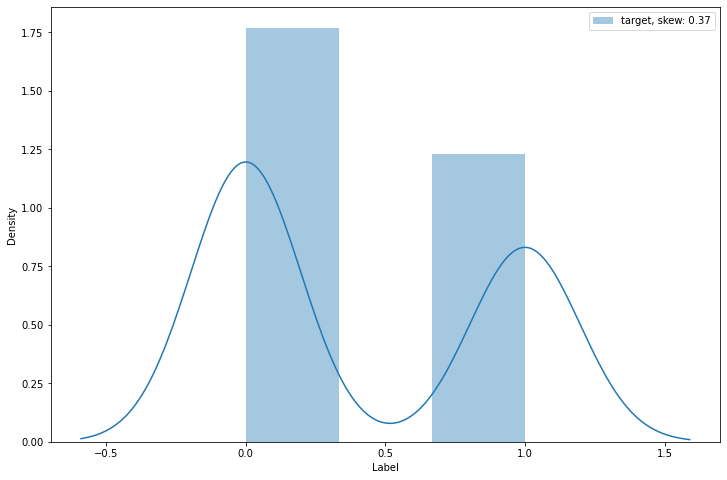

In [41]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

Bisa dilihat pada hasil proses distibusi data pada dataset yang saya gunakan, bahwa tweets yang bertema Politik (kode = 1) sebanyak 41 (41.0%). Sedangkan tweets yang bertema Non Politik (kode = 0) sebanyak 59 (59.0%). 

## Fitur Ekstraksi Menggunakan TF-IDF

## Cek Label (Parameter Politik (1) dan Non Politik (0) )

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
vectorizer = TfidfVectorizer()

In [44]:
politik_reviews = dataset[(dataset["Label"] == 1)]
npolitik_reviews = dataset[(dataset["Label"] == 0)]

## Cek Label Politik Reviews

In [45]:
politik_reviews.head()

,Unnamed: 0,Tweets,Label,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
0,0,Ketua DPP PHRI DKI Jakarta Sutrisno Iwantono b...,1,ketua dpp phri dki jakarta sutrisno iwantono b...,"['ketua', 'dpp', 'phri', 'dki', 'jakarta', 'su...","['ketua', 'dpp', 'phri', 'dki', 'jakarta', 'su...",ketua dpp phri dki jakarta sutrisno iwantono b...,ketua dpp phri dki jakarta sutrisno iwantono b...,ketua dpp phri dki jakarta sutrisno iwantono b...
1,1,"Soalnya, RKUHP yang baru berisi pasal perzinah...",1,soalnya rkuhp yang baru berisi pasal perzinaha...,"['soalnya', 'rkuhp', 'yang', 'baru', 'berisi',...","['soalnya', 'rkuhp', 'yang', 'baru', 'berisi',...",soalnya rkuhp yang baru berisi pasal perzinaha...,soalnya rkuhp yang baru berisi pasal perzinaha...,soal rkuhp baru isi pasal perzinahan anggap ru...
2,2,"#Semuabisakena. Inget, kan, sama kampanye peno...",1,inget kan sama kampanye penolakan rancangan un...,"['inget', 'kan', 'sama', 'kampanye', 'penolaka...","['inget', 'kan', 'sama', 'kampanye', 'penolaka...",inget kan sama kampanye penolakan rancangan un...,inget kan sama kampanye penolakan rancangan un...,inget kan sama kampanye tolak rancang undang u...
3,3,"Gugatannya udah kalah. Selanjutnya, Pak Jokowi...",1,gugatannya udah kalah selanjutnya pak jokowi d...,"['gugatannya', 'udah', 'kalah', 'selanjutnya',...","['gugatannya', 'udah', 'kalah', 'selanjutnya',...",gugatannya udah kalah selanjutnya pak jokowi d...,gugatannya udah kalah selanjutnya pak jokowi d...,gugat udah kalah lanjut pak jokowi para menter...
5,5,"Menurut LBH Bogor, Irwansyah, pemerintah Kota ...",1,menurut lbh bogor irwansyah pemerintah kota bo...,"['menurut', 'lbh', 'bogor', 'irwansyah', 'peme...","['menurut', 'lbh', 'bogor', 'irwansyah', 'peme...",menurut lbh bogor irwansyah pemerintah kota bo...,menurut lbh bogor irwansyah pemerintah kota bo...,lbh bogor irwansyah perintah kota bogor gugat ...


In [46]:
Politik_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Politik_tf_idf = Politik_tf_idf_vect.fit_transform(politik_reviews["ProcessedText"].values)

In [47]:
Politik_tf_idf.shape

(41, 795)

In [48]:
features = Politik_tf_idf_vect.get_feature_names()

idfValues = Politik_tf_idf_vect.idf_

d = dict(zip(features, 9 - idfValues))

sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

for i in range(200):
    print(sortedDict[i])

('eliezer', 6.564915474710677)
('dakwa', 6.341771923396467)
('sidang', 6.341771923396467)
('enggak', 6.2082405307719455)
('ferdy', 6.2082405307719455)
('richard', 6.2082405307719455)
('richard eliezer', 6.2082405307719455)
('bunuh', 6.0540898509446865)
('ferdy sambo', 6.0540898509446865)
('kasus', 6.0540898509446865)
('narasi', 6.0540898509446865)
('perdana', 6.0540898509446865)
('sambo', 6.0540898509446865)
('aju', 5.871768294150732)
('atas', 5.871768294150732)
('bilang', 5.871768294150732)
('brigadir', 5.871768294150732)
('buat', 5.871768294150732)
('da', 5.871768294150732)
('daily', 5.871768294150732)
('justice', 5.871768294150732)
('kalo', 5.871768294150732)
('narasi daily', 5.871768294150732)
('sama', 5.871768294150732)
('sidang perdana', 5.871768294150732)
('udah', 5.871768294150732)
('yosua', 5.871768294150732)
('acara', 5.648624742836523)
('banget', 5.648624742836523)
('bharada', 5.648624742836523)
('brigadir yosua', 5.648624742836523)
('deh', 5.648624742836523)
('eksepsi', 5.6

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [50]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

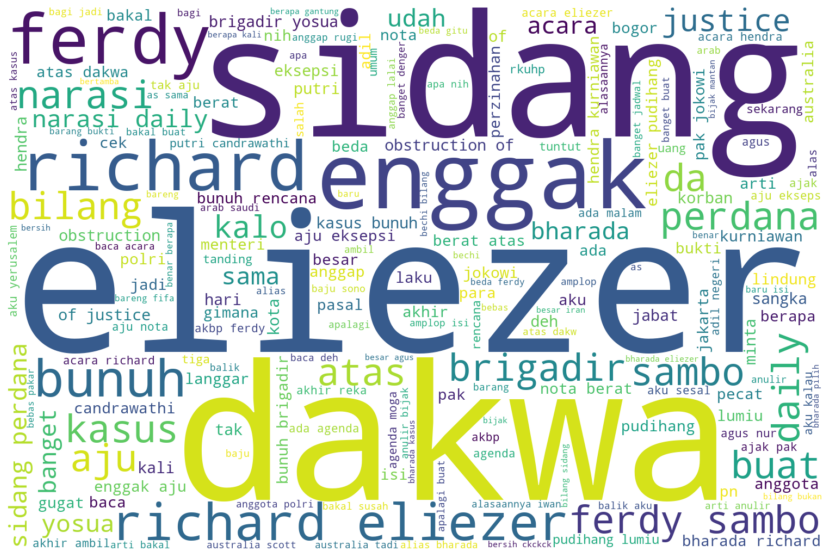

In [51]:
PlotWordCloud(d)

## Cek Label Non Politik

In [52]:
npolitik_reviews.head()

,Unnamed: 0,Tweets,Label,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
4,4,Semoga aja amunisi Kominfo bisa efektif buat n...,0,semoga aja amunisi kominfo bisa efektif buat n...,"['semoga', 'aja', 'amunisi', 'kominfo', 'bisa'...","['semoga', 'aja', 'amunisi', 'kominfo', 'bisa'...",semoga aja amunisi kominfo bisa efektif buat n...,semoga aja amunisi kominfo bisa efektif buat n...,moga aja amunisi kominfo efektif buat ngeberan...
6,6,"“Harapan saya untuk Arema, yang meninggal dan ...",0,harapan saya untuk arema yang meninggal dan ja...,"['harapan', 'saya', 'untuk', 'arema', 'yang', ...","['harapan', 'saya', 'untuk', 'arema', 'yang', ...",harapan saya untuk arema yang meninggal dan ja...,harapan saya untuk arema yang meninggal dan ja...,harap untuk arema tinggal jadi korban suporter...
9,9,Apa sih etilen glikol dan dietilen glikol yang...,0,apa sih etilen glikol dan dietilen glikol yang...,"['apa', 'sih', 'etilen', 'glikol', 'dan', 'die...","['apa', 'sih', 'etilen', 'glikol', 'dan', 'die...",apa sih etilen glikol dan dietilen glikol yang...,apa sih etilen glikol dan dietilen glikol yang...,apa etilen glikol dietilen glikol sebab ratus ...
10,10,"Tidak cuma keluarga, Nanda, sahabat Revan pun ...",0,tidak cuma keluarga nanda sahabat revan pun me...,"['tidak', 'cuma', 'keluarga', 'nanda', 'sahaba...","['tidak', 'cuma', 'keluarga', 'nanda', 'sahaba...",tidak cuma keluarga nanda sahabat revan pun me...,tidak cuma keluarga nanda sahabat revan pun me...,cuma keluarga nanda sahabat revan rasa amat hi...
11,11,"Dua hari sebelum peristiwa, Revan sudah berpam...",0,dua hari sebelum peristiwa revan sudah berpami...,"['dua', 'hari', 'sebelum', 'peristiwa', 'revan...","['dua', 'hari', 'sebelum', 'peristiwa', 'revan...",dua hari sebelum peristiwa revan sudah berpami...,dua hari sebelum peristiwa revan sudah berpami...,hari peristiwa revan pamit ayah tonton langsun...


In [53]:
NPolitik_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
NPolitik_tf_idf = NPolitik_tf_idf_vect.fit_transform(npolitik_reviews["ProcessedText"].values)

In [54]:
NPolitik_tf_idf.shape

(59, 1099)

In [55]:
features = NPolitik_tf_idf_vect.get_feature_names()

idfValues = NPolitik_tf_idf_vect.idf_

d = dict(zip(features, 9 - idfValues))

sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

for i in range(200):
    print(sortedDict[i])

('narasi', 6.3905620875658995)
('daily', 6.2082405307719455)
('narasi daily', 6.2082405307719455)
('kanjuruhan', 6.102880015114119)
('korban', 5.985096979457735)
('bakal', 5.851565586833212)
('banyak', 5.697414907005954)
('buat', 5.697414907005954)
('peristiwa', 5.697414907005954)
('rem', 5.697414907005954)
('sama', 5.697414907005954)
('aja', 5.515093350212)
('akut', 5.515093350212)
('bakar', 5.515093350212)
('banget', 5.515093350212)
('baru', 5.515093350212)
('deh', 5.515093350212)
('fifa', 5.515093350212)
('gagal', 5.515093350212)
('ginjal', 5.515093350212)
('ginjal akut', 5.515093350212)
('jumlah', 5.515093350212)
('kasus', 5.515093350212)
('orang', 5.515093350212)
('pssi', 5.515093350212)
('tinggal', 5.515093350212)
('apa', 5.2919497988977895)
('api', 5.2919497988977895)
('bintan', 5.2919497988977895)
('bisa', 5.2919497988977895)
('bola', 5.2919497988977895)
('enggak', 5.2919497988977895)
('gagal ginjal', 5.2919497988977895)
('gimana', 5.2919497988977895)
('hasil', 5.29194979889778

In [56]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

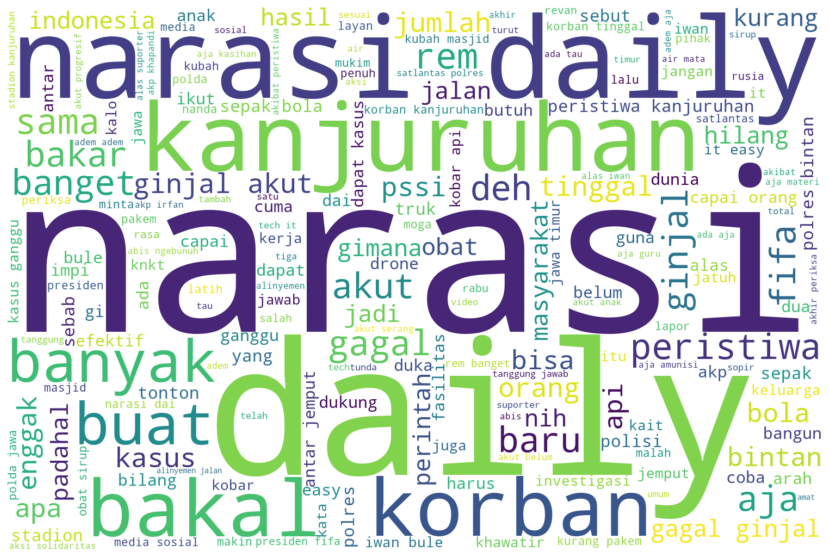

In [57]:
PlotWordCloud(d)

## Cek Politik Non Politik untuk semua Label

In [58]:
tfidf_vect = TfidfVectorizer(ngram_range = (1,2))

In [59]:
Data_TFIDF = tfidf_vect.fit_transform(dataset["ProcessedText"].values)

In [60]:
Data_TFIDF.shape

(100, 1789)

## Training dan Testing membagi menjadi 70 - 30

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [62]:
train_TFIDF, test_TFIDF, train_labels_TFIDF, test_labels_TFIDF = train_test_split(dataset_feature, dataset_label, test_size = 0.3, random_state=42)

In [63]:
train_TFIDF.shape, test_TFIDF.shape, train_labels_TFIDF.shape, test_labels_TFIDF.shape

((70,), (30,), (70,), (30,))

## Model Naive Bayes

In [64]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [65]:
parameters_nb = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
    'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100)
}

In [66]:
classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv = 3, n_jobs=-1)

In [67]:
classifier_nb.fit(train_TFIDF, train_labels_TFIDF.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]})

## Nilai Accuracy Training Set dan Test Set

In [68]:
y_pred_nb_train = classifier_nb.predict(train_TFIDF)
accuracy_nb_train = accuracy_score(train_labels_TFIDF, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_TFIDF)
accuracy_nb_test = accuracy_score(test_labels_TFIDF, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)

Accuracy Training set:  1.0
Accuracy Test set:  0.8666666666666667


## Nilai Recall Training Set dan Test Set

In [69]:
recall_nb_train = recall_score(train_labels_TFIDF, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(test_labels_TFIDF, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)

Recall Training set:  1.0
Recall Test set:  0.8666666666666667


## Nilai Precission Training Set dan Test Set

In [70]:
precision_nb_train = precision_score(train_labels_TFIDF, y_pred_nb_train, average='weighted')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(test_labels_TFIDF, y_pred_nb_test, average='weighted')
print("Precision Test set: ", precision_nb_test)

Precision Training set:  1.0
Precision Test set:  0.8666666666666667


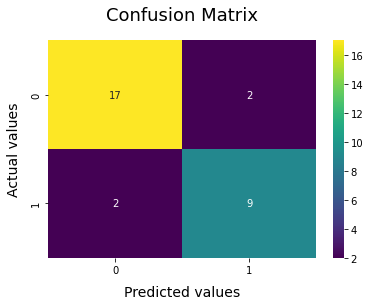

In [71]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_labels_TFIDF, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

Bisa kita lhat bahwa nilai dari TP(1,1) yakni 9 dan TN(0,0) 17 sementara nilai FP(0,1) 2 dan FN (1,0) 2. Dari sini dapat kita lihat bahwa nilai dari TP dan TN lebih tinggi daripada nilai FP dan FN jadi bisa dikatakan bahwa dataset ini merupakan Good Model 

## Visualisasi

In [72]:
models = [
          ('Naive Bayes Multinomial', accuracy_nb_train, accuracy_nb_test),                    
         ]

In [73]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes Multinomial,1.0,0.866667


In [74]:
models_comparison = [
                        ('Naive Bayes Multinomial', accuracy_nb_test, recall_nb_test, precision_nb_test),                          
                    ]

In [75]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Naive Bayes Multinomial,0.866667,0.866667,0.866667


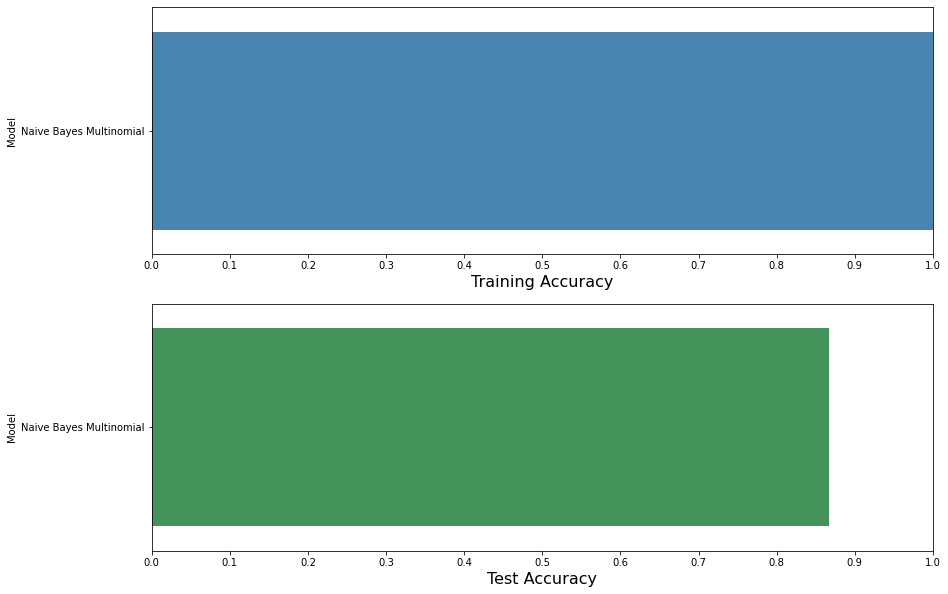

In [76]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

## Kesimpulan

- Dari hasil diatas dapat dilihat bahwa dari dataset sesudah dilakukan proses pre processing (normalisasi kata slang dan stemming) memperoleh nilai akurasi dari dataset training dan dataset testing yang tingkat keakurasian yang tidak cukup jauh. Nilai yang diperoleh untuk dataset traning sebesar 1.0 sedangkan untuk dataset testing 0.87. Dari sini dapat disimpulkan bahwa proses pre processing sudah berjalan secara baik.